# Detecting Brain Tumors from MRI images
### We decided to exploit the power of Transfer Learning to develop a supporting tool for Obejct Detection and Instance Segmentation applied to brain tumors for surgeons and radiologists.
### Using object detection and instance segmentation on MRI scans of the brain offers significant benefits in identifying tumors. These techniques provide accurate localization, early detection, aid in treatment planning, and enhance workflow efficiency. Object detection techniques precisely locate tumor regions within MRI scans, providing information about their exact location, boundaries, size, shape, and relationship with surrounding structures. This precise localization enhances the accuracy of diagnosis and subsequent treatment planning. Automated instance segmentation can detect subtle abnormalities in MRI scans that might be missed during manual examination, enabling early detection of brain tumors. Tumor segmentation also allows the creation of three-dimensional models, useful to provide visual representations of tumors in relation to surrounding structures, assisting physicians in treatment planning. This potentially offer insights into potential risks, determine optimal surgical approaches, and guide radiation therapy delivery, improving the precision and effectiveness of treatment interventions.
### It is important to note that while object detection and instance segmentation provide valuable assistance, their outputs should always be carefully reviewed by medical professionals. The final diagnosis and treatment decisions should be made by experienced healthcare providers who integrate these findings with their clinical expertise.

---------------------------

## Installing the needed packages for Roboflow and Ultralytics.
#### The CLI command '--quiet' avoids printing the full undergoing process during the package installation.

In [ ]:
!pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00


In [ ]:
!pip install ultralytics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.6/612.6 kB 14.0 MB/s eta 0:00:00


## Importing the dataset from Roboflow with the private API key.

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="HIDDEN_KEY")
project = rf.workspace("sriwijaya-university-hivwu").project("tumor-otak-tbpou")
dataset = project.version(11).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.124, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to tumor-otak-11 in yolov8:: 100%|██████████| 6140/6140 [00:01<00:00, 3382.39it/s]


## Importing the needed modules and setting the machine.

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

---------------------

# Training our model and evaluating its performance.

## Training the YOLOv8x (Extreme) model on the training set over thirthy epochs, with early stopping rounds (patience) set at 3 consecutive non-improving rounds.
#### The image size ('imgsz') is set to 640, after trying with a 'brute force' approach all the optimizers, the 'classic' stochastic gradient descent (optimizer='SGD') was selected.

In [ ]:
!yolo task=segment mode=train model=yolov8x-seg.pt data={dataset.location}/data.yaml epochs=30 patience=2 imgsz=640 optimizer='SGD'

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/tumor-otak-11/data.yaml, epochs=30, patience=2, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False

#### The peak in overall validation accuracy is reached at the second epoch, then decreasing with our model stopping iterations at the fifth due to the hyperparameter 'patience=3'.
#### With a validation accuracy of 0.865 and 0.863 for the 'Meningioma' and 'Pituitary' classes respectively, the model reaches the highest results among the benchmarked ones. Throughout our trials, the class 'Glioma' results the hardest one to predict, with a validation accuracy of 0.515 for our best-performing model.

In [ ]:
!ls runs/segment/train2

args.yaml					    MaskR_curve.png
BoxF1_curve.png					    results.csv
BoxP_curve.png					    results.png
BoxPR_curve.png					    train_batch0.jpg
BoxR_curve.png					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2.jpg
confusion_matrix.png				    val_batch0_labels.jpg
events.out.tfevents.1688225608.38d987f59a6f.6497.0  val_batch0_pred.jpg
labels_correlogram.jpg				    val_batch1_labels.jpg
labels.jpg					    val_batch1_pred.jpg
MaskF1_curve.png				    val_batch2_labels.jpg
MaskP_curve.png					    val_batch2_pred.jpg
MaskPR_curve.png				    weights


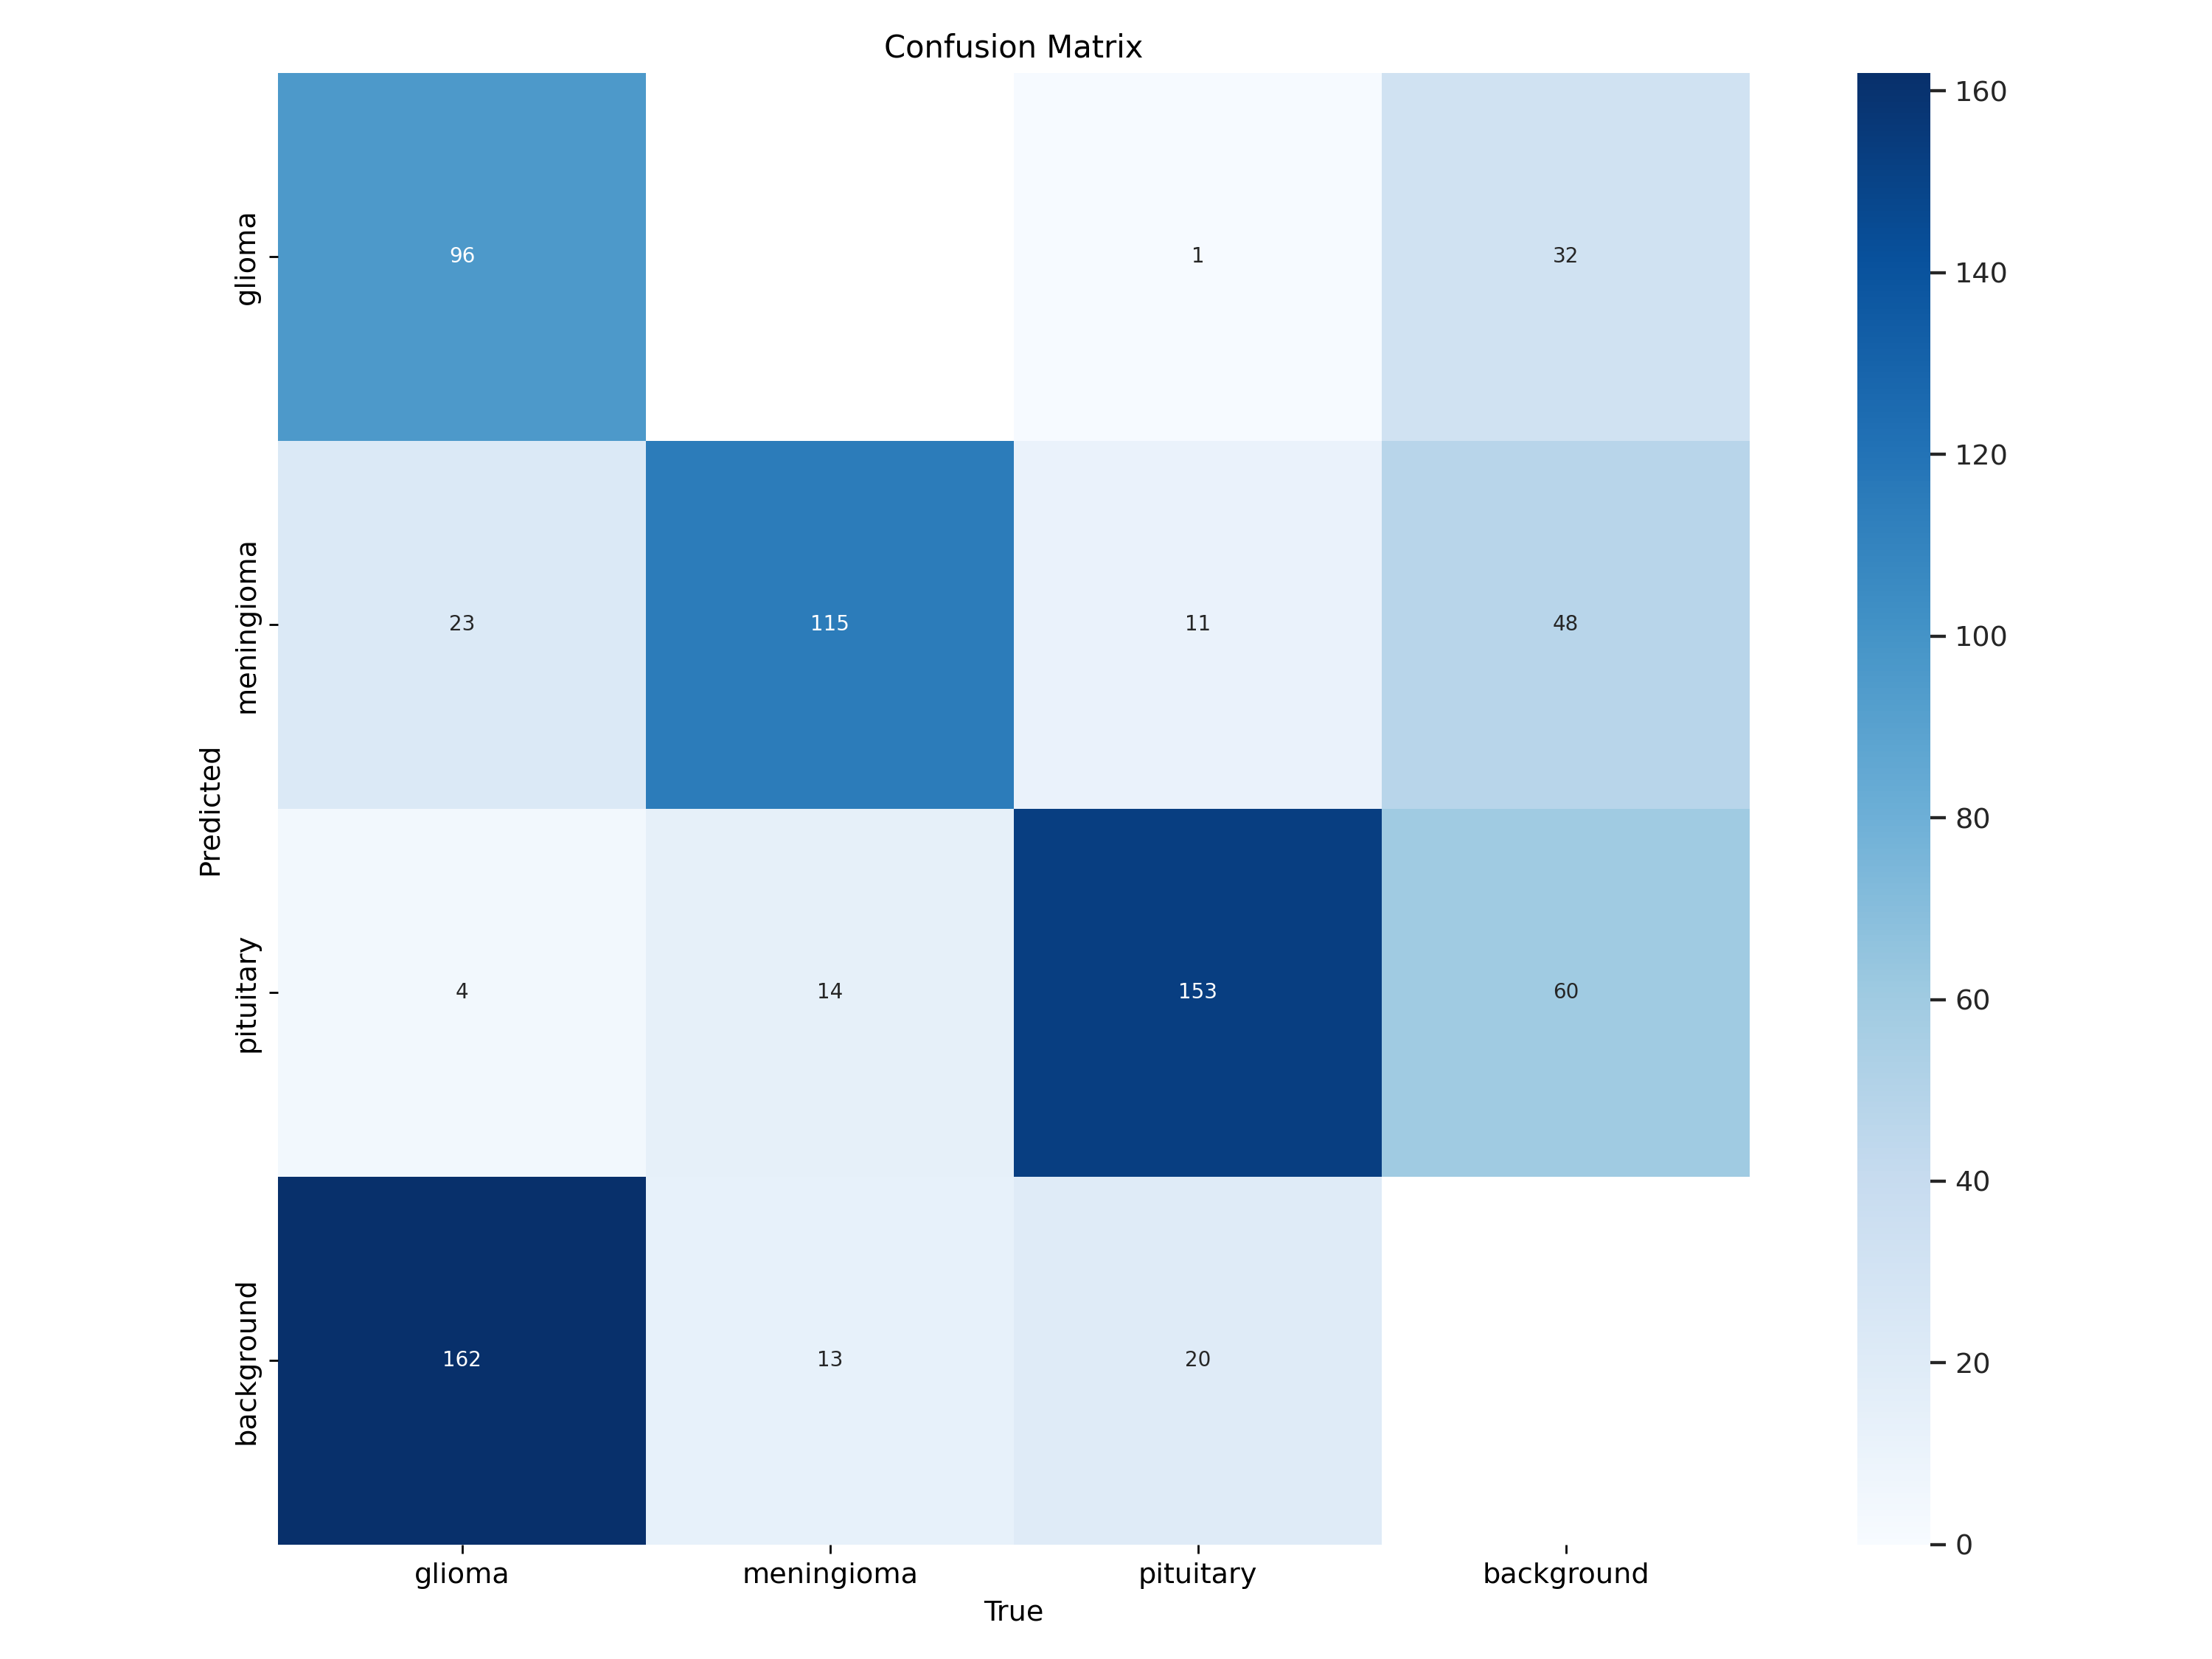

In [ ]:
Image(filename='runs/segment/train2/confusion_matrix.png', width=600)

#### As the Confusion Matrix suggests, the performance of the model ran on the YOLOv8x engine in detecting the tumor classes of is optimal for "Meningioma" and "Pituitary", while shows some misclassification problems with the "Glioma", which happens to be often misclassified as "Background" so not recognized.

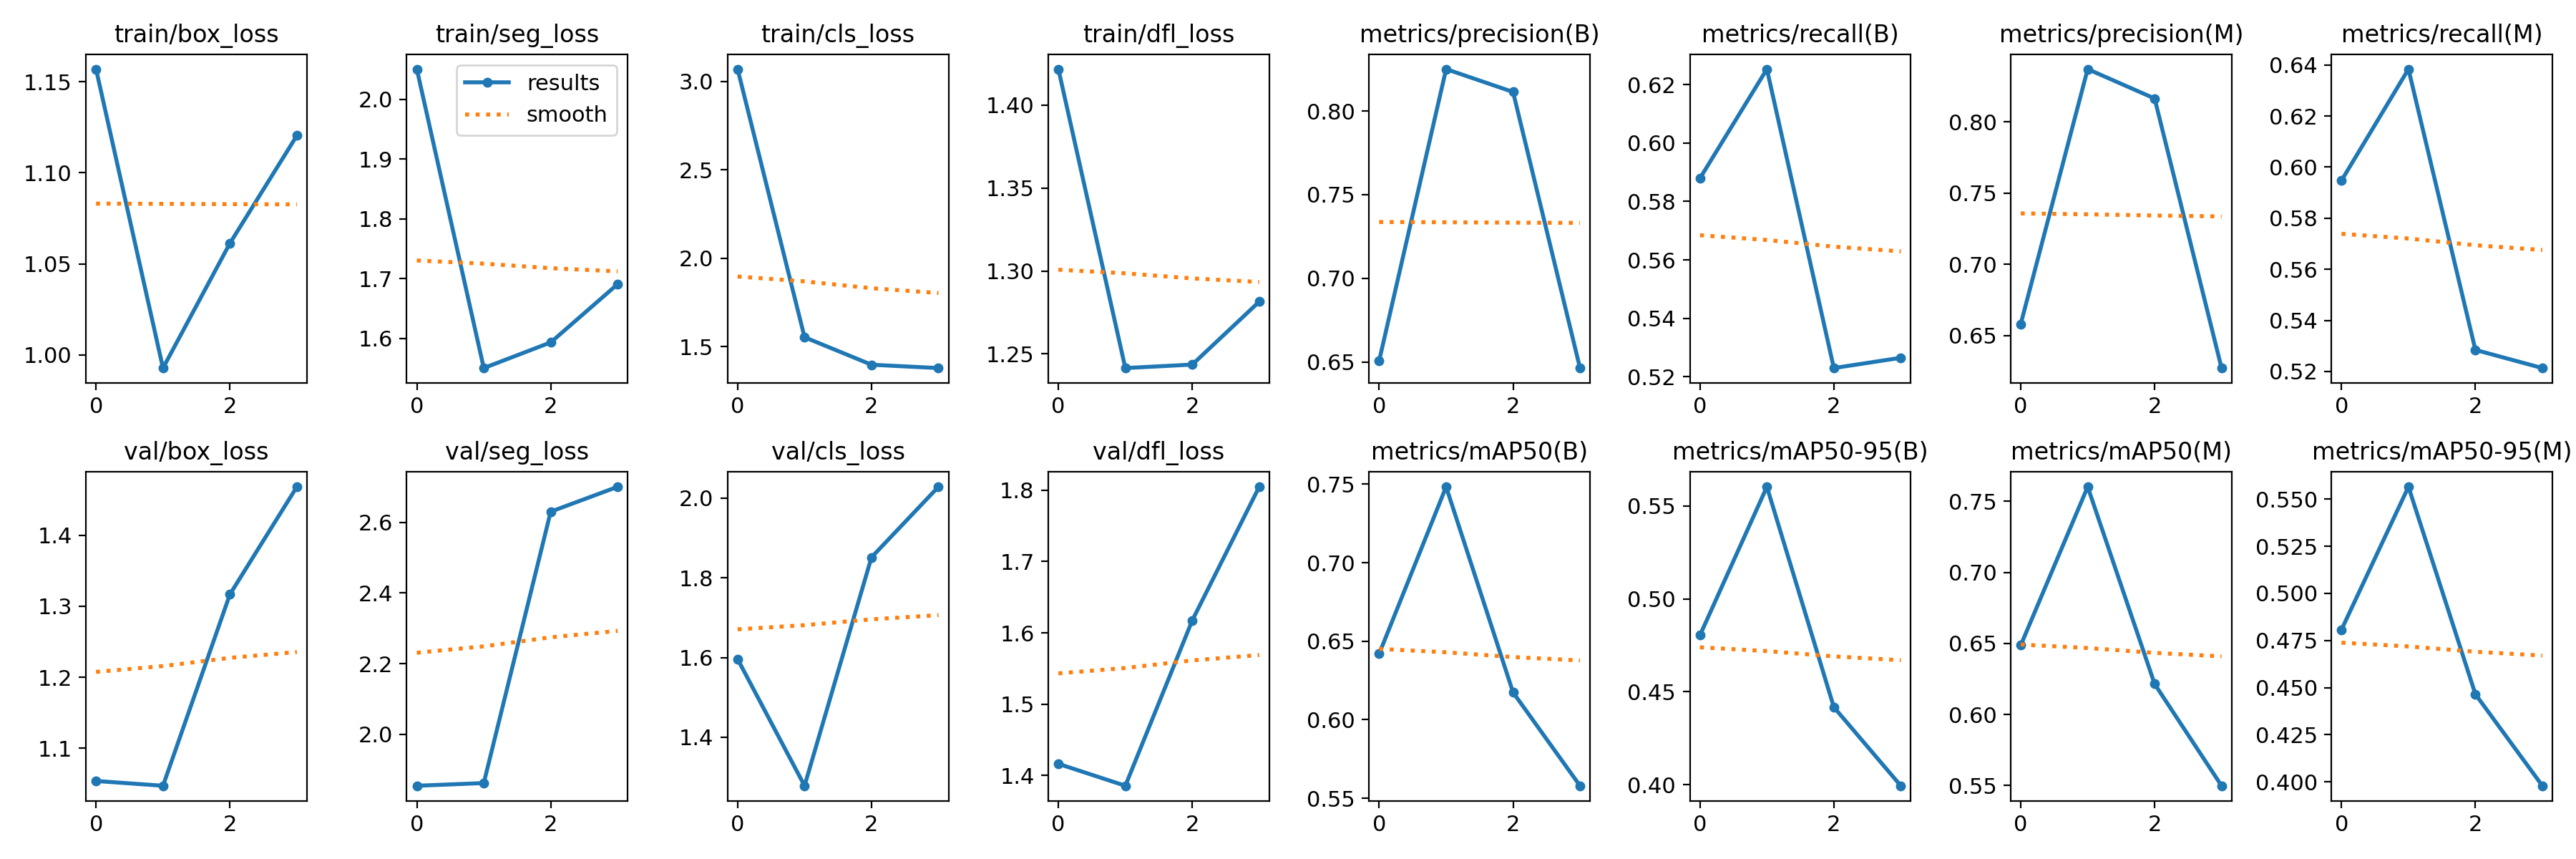

In [ ]:
Image(filename='runs/segment/train2/results.png', width=600)

#### The different curves displayed give us an idea on how the different training epochs affect the loss functions and the different metrics. We can see that most metrics reach a maximum at the 2nd epoch.

## Predicting unseen images with the validated model. Here we simulate an inference on unseen and unlabeled images.

In [ ]:
!yolo task=segment mode=predict model=runs/segment/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71723545 parameters, 0 gradients

image 1/308 /content/tumor-otak-11/test/images/1003_jpg.rf.06dd1fc1375a7921252ea73761482b9e.jpg: 640x640 1 pituitary, 83.7ms
image 2/308 /content/tumor-otak-11/test/images/1012_jpg.rf.07aca99a33c83ecb7c23d386ca4b6ad0.jpg: 640x640 2 pituitarys, 71.1ms
image 3/308 /content/tumor-otak-11/test/images/1018_jpg.rf.75eca1b6027d1201419ebc7583c8bcea.jpg: 640x640 1 pituitary, 71.0ms
image 4/308 /content/tumor-otak-11/test/images/102_jpg.rf.4849025d48c40b9d9c30e38db7bc1bb1.jpg: 640x640 (no detections), 62.4ms
image 5/308 /content/tumor-otak-11/test/images/1033_jpg.rf.75e7ae215b8c65f6ff5c2b476b27f9c9.jpg: 640x640 1 pituitary, 64.4ms
image 6/308 /content/tumor-otak-11/test/images/1037_jpg.rf.f93c5f029791be427d2bff5fe288e623.jpg: 640x640 1 meningioma, 1 pituitary, 62.8ms
image 7/308 /content/tumor-otak-11/test/images/1041_jpg.rf.fd246501a5

## Exploring the folder of predicted images and analyzing some of the images.

In [ ]:
!ls runs/segment/predict

1003_jpg.rf.06dd1fc1375a7921252ea73761482b9e.jpg
1012_jpg.rf.07aca99a33c83ecb7c23d386ca4b6ad0.jpg
1018_jpg.rf.75eca1b6027d1201419ebc7583c8bcea.jpg
102_jpg.rf.4849025d48c40b9d9c30e38db7bc1bb1.jpg
1033_jpg.rf.75e7ae215b8c65f6ff5c2b476b27f9c9.jpg
1037_jpg.rf.f93c5f029791be427d2bff5fe288e623.jpg
1041_jpg.rf.fd246501a5d525a8fe2d44ef0286746e.jpg
1046_jpg.rf.93aace59b79d2a35c032308ce1026f6d.jpg
104_jpg.rf.dece1b11222e4f36d4a2a57057f6b892.jpg
1058_jpg.rf.4821a7c44fa8139b54fd9c3bc514ee80.jpg
1072_jpg.rf.11eb07cee40c7f406e3b0e5f59ffec5f.jpg
1077_jpg.rf.cdd54529570b59bc1976f3176d023021.jpg
1083_jpg.rf.8fed5c76eae5c7247b4167f362184422.jpg
1087_jpg.rf.8eacee0926ab55e75f28711c32cfed66.jpg
1090_jpg.rf.a7123356ed33eab016f425bc27efbd7c.jpg
1091_jpg.rf.52286317bb7f4c4ac63a0bdfa0c8dfd0.jpg
10_jpg.rf.b21513b77545edb4af5a4f1512089464.jpg
1122_jpg.rf.43bdad2fe75d2dd003ff9bc2d87a46c5.jpg
1125_jpg.rf.f0531f7166ed1c7a7c5f90ffa31b6f30.jpg
1157_jpg.rf.eb589fdfe9d8faeb589bdc7951c13a95.jpg
1164_jpg.rf.b69cacac2293

-----------------------------------
## Visualizing the predicited classes.
### Analyzing Pituitary tumor.

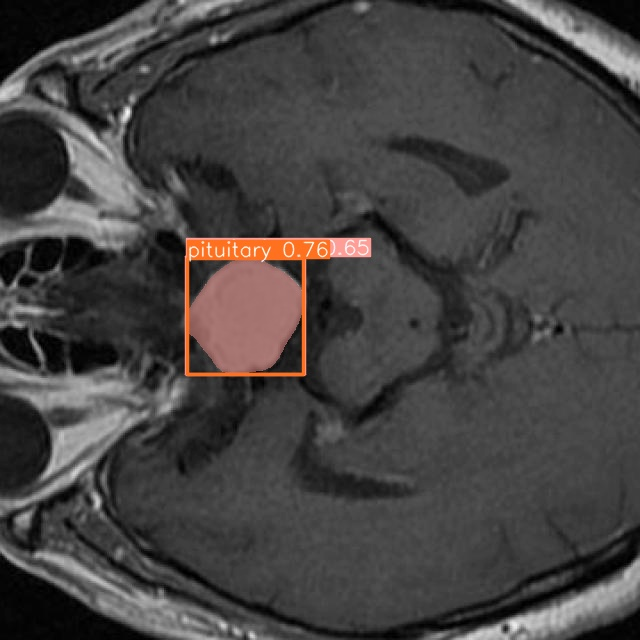

In [ ]:
Image(filename='runs/segment/predict/38_jpg.rf.9f45187d151960dd8b60cc88eb679b19.jpg', width=600)

#### Recalling a class-specific validation accuracy of 0.863 we can see from this first image that the Pituitary tumor is correctly detected through object detection and segmented through instance segmentation.
#### Most Pituitary tumors are benign, which means they are non-cancerous, grow slowly, and do not spread to other parts of the body. However, the tumors can make the pituitary gland produce either too many or too few hormones, which can still cause a variety of problems in the body, thus their early detection is fundamental.

----------------------------

### Analyzing Meningioma.

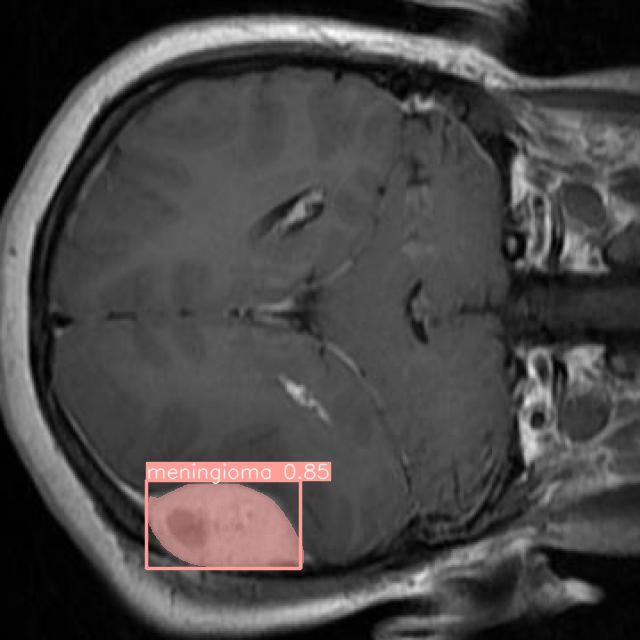

In [ ]:
Image(filename='runs/segment/predict/310_jpg.rf.efc355e24a093b7f1abe2e8a927e5989.jpg', width=600)

#### Recalling a class-specific validation accuracy of 0.865 we can see from this first image that the Meningioma is correctly detected through object detection and segmented through instance segmentation.
#### A meningioma is a primary central nervous system (CNS) tumor. This means it begins in the brain or spinal cord. Overall, meningiomas are the most common type of primary brain tumor. The 5-year relative survival rate for malignant meningioma is 79% for children ages 0 to 14 and more than 84% in people ages 15 to 39. For adults 40 and over, the 5-year relative survival rate is around 65%.

-------------------------

### Analyzing Glioma tumor.

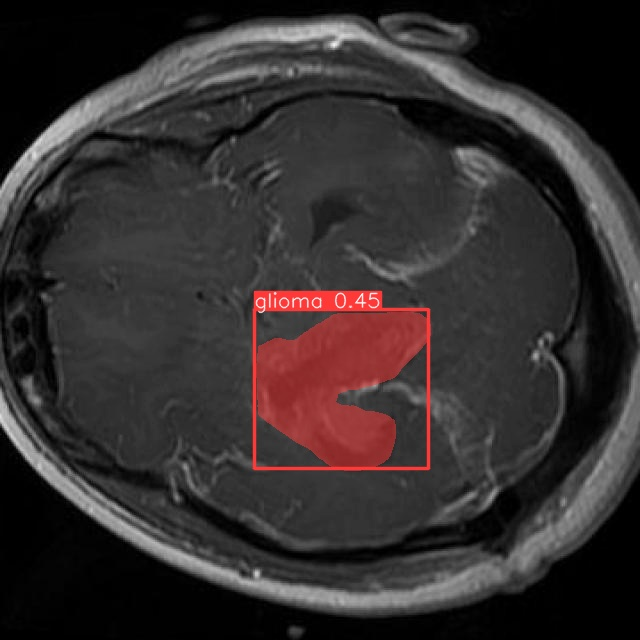

In [ ]:
Image(filename='runs/segment/predict/2209_jpg.rf.98f50736cf98455ff821608edb29da44.jpg', width=600)

#### This image offers interesting insights. The Glioma class proved to be the hardest to detect, a class-specific validation accuracy of 0.515 is the best we could obtain through the hyperparameter tuning performed on the different YOLO v8 models. In fact, we can clearly notice how the confidence of our object detection algorithm results quite low, at 0.45 in this case.
#### Gliomas are cancerous brain tumours that start in glial cells. These are the supporting cells of the brain and the spinal cord. They can spread outside of the brain or spine and are the most life-threatening form of brain cancer because they can be hard to reach and treat with surgery. For this type of tumor, several studies have reported a 5% 5-year survival rate.

------------------------------